In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

from sklearn.linear_model import LinearRegression

In [2]:
raw_data= pd.read_csv('1.04. Real-life example.csv')

In [3]:
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [7]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [10]:
data = raw_data.drop(['Model'], axis=1)

In [12]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [14]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [15]:
data_no_MV=data.dropna(axis=0)

In [16]:
data_no_MV.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


C:\Users\thead\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

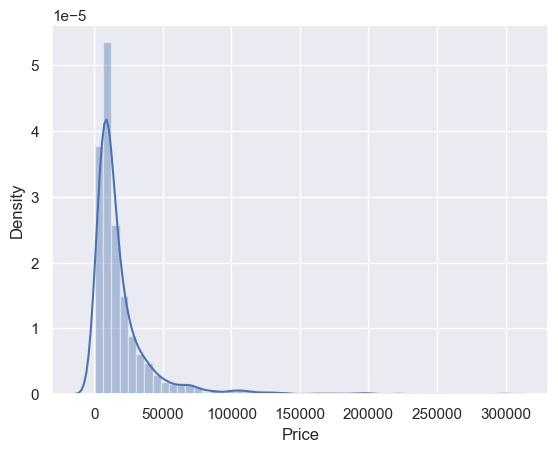

In [19]:
sns.distplot(data_no_MV['Price'])

In [20]:
q=data_no_MV['Price'].quantile(0.99)
data_1 = data_no_MV[data_no_MV['Price']<q]

In [21]:
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\thead\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

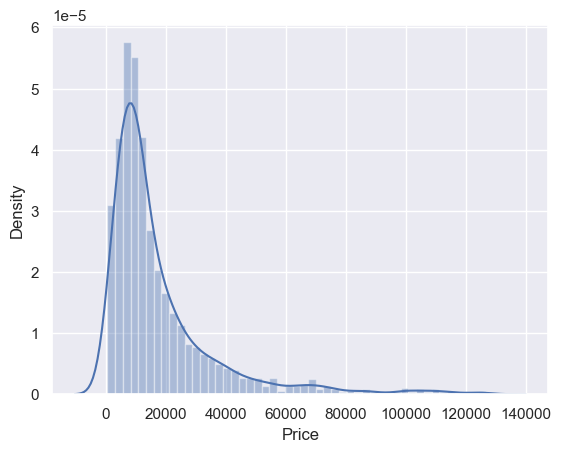

In [22]:
sns.distplot(data_1['Price'])

C:\Users\thead\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

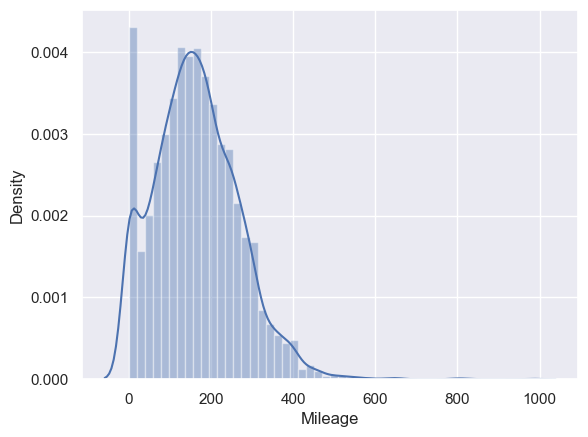

In [24]:
sns.distplot(data_1['Mileage'])

In [34]:
q=data_no_MV['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

C:\Users\thead\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

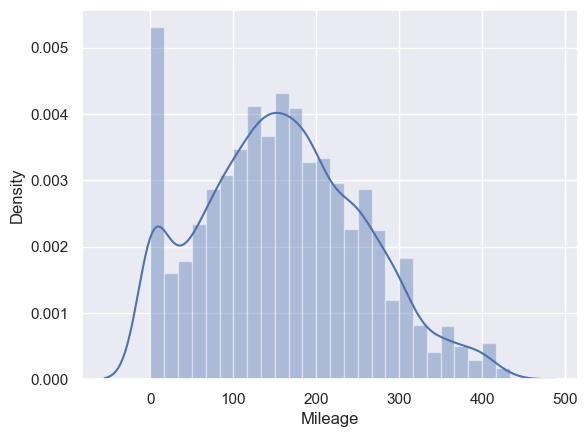

In [26]:
sns.distplot(data_2['Mileage'])

In [27]:
data_3=data_2[data_2['EngineV']<6.5]

C:\Users\thead\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

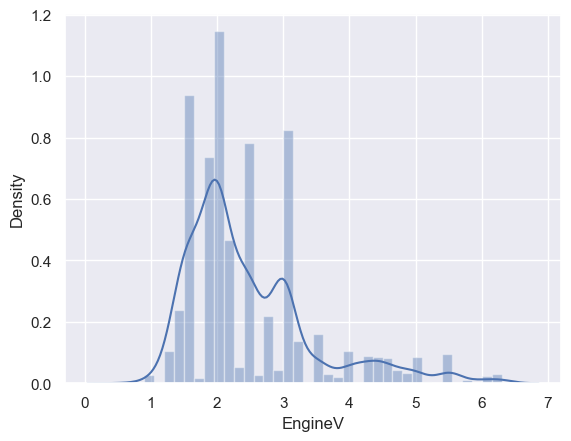

In [28]:
sns.distplot(data_3['EngineV'])

C:\Users\thead\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

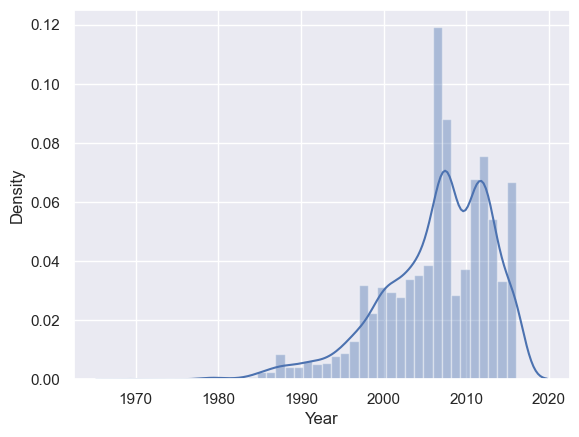

In [29]:
sns.distplot(data_3['Year'])

In [33]:
q=data_3['Year'].quantile(0.1)
data_4 = data_3[data_3['Year']>q]

C:\Users\thead\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

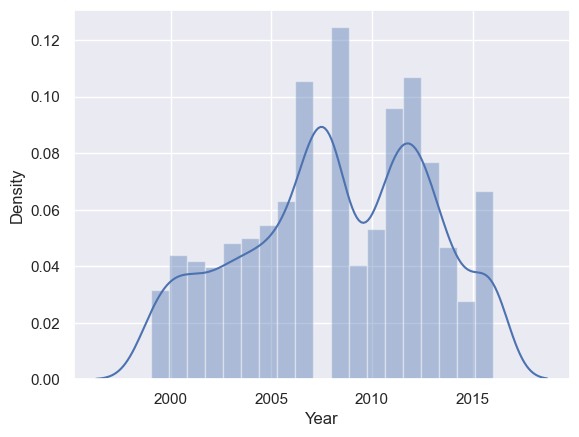

In [35]:
sns.distplot(data_4['Year'])

In [36]:
data_4.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016


In [37]:
cleaned_data=data_4.reset_index(drop=True)

In [38]:
cleaned_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3500,3500.000000,3500,3500.000000,3500.000000,3500,3500,3500.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,762,NaN,1213,NaN,NaN,1706,3211,NaN
mean,NaN,21747.653674,NaN,146.358000,2.491269,NaN,NaN,2008.226571
std,NaN,26941.864035,NaN,87.423095,1.003378,NaN,NaN,4.607899
min,NaN,1200.000000,NaN,0.000000,0.600000,NaN,NaN,1999.000000
25%,NaN,8486.750000,NaN,82.750000,1.800000,NaN,NaN,2005.000000
50%,NaN,12900.000000,NaN,146.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,23999.000000,NaN,204.000000,3.000000,NaN,NaN,2012.000000


In [39]:
cleaned_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
1,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
2,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
3,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
4,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016


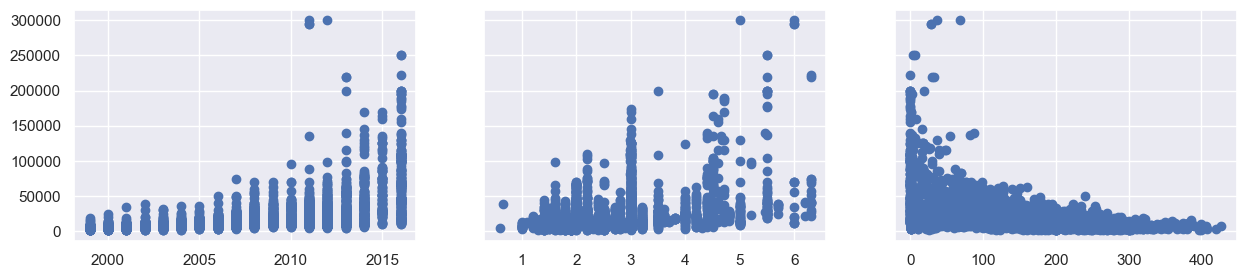

In [45]:
f,(ax1,ax2,ax3)= plt.subplots(1,3,sharey=True , figsize=(15,3))
ax1.scatter(cleaned_data['Year'], cleaned_data['Price'])
ax2.scatter(cleaned_data['EngineV'], cleaned_data['Price'])
ax3.scatter(cleaned_data['Mileage'], cleaned_data['Price'])
plt.show()

In [48]:
log_price=np.log(cleaned_data['Price'])

In [51]:
cleaned_data['log_Price']=log_price
cleaned_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_Price
0,Mercedes-Benz,8.974618,van,427,2.9,Diesel,yes,1999,2.194400
1,Mercedes-Benz,9.495519,sedan,358,5.0,Gas,yes,2003,2.250820
2,Audi,10.043249,crossover,240,4.2,Petrol,yes,2007,2.306901
3,Toyota,9.814656,crossover,120,2.0,Petrol,yes,2011,2.283877
4,Mercedes-Benz,12.206068,crossover,0,5.5,Petrol,yes,2016,2.501933
...,...,...,...,...,...,...,...,...,...
3495,Volkswagen,9.350102,van,163,2.5,Diesel,yes,2008,2.235387
3496,Toyota,9.792556,sedan,35,1.6,Petrol,yes,2014,2.281623
3497,Mercedes-Benz,11.736069,sedan,9,3.0,Diesel,yes,2014,2.462667
3498,BMW,8.779557,sedan,1,3.5,Petrol,yes,1999,2.172426


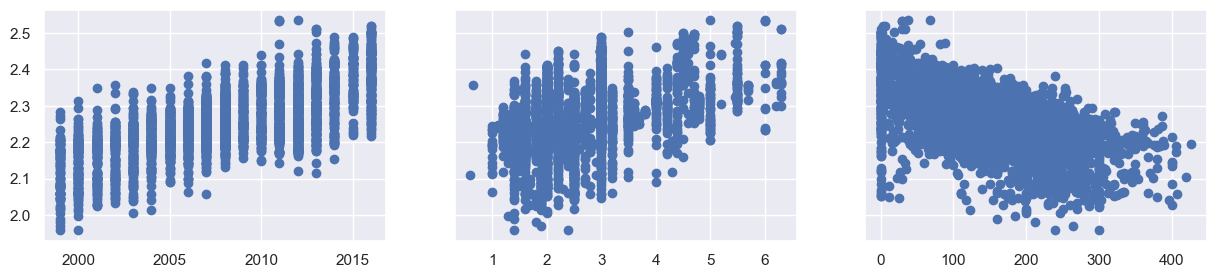

In [52]:
f,(ax1,ax2,ax3)= plt.subplots(1,3,sharey=True , figsize=(15,3))
ax1.scatter(cleaned_data['Year'], cleaned_data['log_Price'])
ax2.scatter(cleaned_data['EngineV'], cleaned_data['log_Price'])
ax3.scatter(cleaned_data['Mileage'], cleaned_data['log_Price'])
plt.show()

In [53]:
cleaned_data = cleaned_data.drop(['Price'], axis=1)

In [54]:
cleaned_data.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_Price'], dtype=object)

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = cleaned_data[['Mileage','EngineV','Year']] 
vif= pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i)for i in range(variables.shape[1])]
vif["features"]= variables.columns
vif

,VIF,features
0,3.783133,Mileage
1,7.165761,EngineV
2,10.115063,Year


In [63]:
cleaned_data= cleaned_data.drop(['Year'],axis=1)

In [64]:
cleaned_data

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_Price
0,Mercedes-Benz,van,427,2.9,Diesel,yes,2.194400
1,Mercedes-Benz,sedan,358,5.0,Gas,yes,2.250820
2,Audi,crossover,240,4.2,Petrol,yes,2.306901
3,Toyota,crossover,120,2.0,Petrol,yes,2.283877
4,Mercedes-Benz,crossover,0,5.5,Petrol,yes,2.501933
...,...,...,...,...,...,...,...
3495,Volkswagen,van,163,2.5,Diesel,yes,2.235387
3496,Toyota,sedan,35,1.6,Petrol,yes,2.281623
3497,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2.462667
3498,BMW,sedan,1,3.5,Petrol,yes,2.172426


In [65]:
data_with_dummies= pd.get_dummies(cleaned_data,drop_first=True)

In [66]:
data_with_dummies.head()

,Mileage,EngineV,log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,427,2.9,2.194400,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,358,5.0,2.250820,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,240,4.2,2.306901,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,120,2.0,2.283877,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,0,5.5,2.501933,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1


In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_with_dummies 
vif= pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i)for i in range(variables.shape[1])]
vif["features"]= variables.columns
vif

,VIF,features
0,4.694216,Mileage
1,12.563794,EngineV
2,47.688312,log_Price
3,2.590752,Brand_BMW
4,3.326163,Brand_Mercedes-Benz
5,1.980799,Brand_Mitsubishi
6,2.529535,Brand_Renault
7,2.653198,Brand_Toyota
8,3.542515,Brand_Volkswagen
9,1.589459,Body_hatch


In [70]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [71]:
cols = ['log_Price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [72]:
data_pre_processed  = data_with_dummies[cols]

In [73]:
data_pre_processed.head()

,log_Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,2.194400,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,2.250820,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,2.306901,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,2.283877,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,2.501933,0,5.5,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1


In [76]:
targets=data_pre_processed['log_Price']
inputs = data_pre_processed.drop(['log_Price'],axis=1)

In [89]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(inputs)


StandardScaler()

In [90]:
scaled_inputs=scaler.transform(inputs)

In [97]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, test_size=0.2, random_state=365)

In [98]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [99]:
y_hat = reg.predict(x_train)

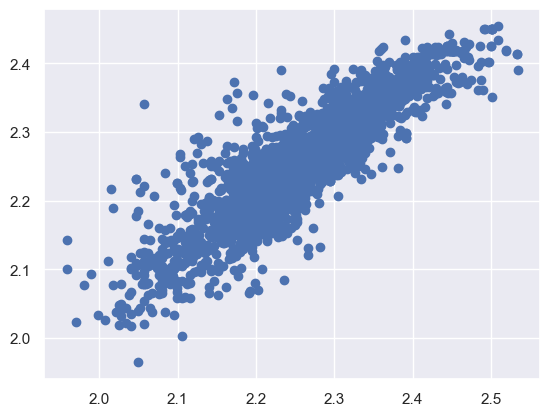

In [100]:
plt.scatter(y_train,y_hat)

C:\Users\thead\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

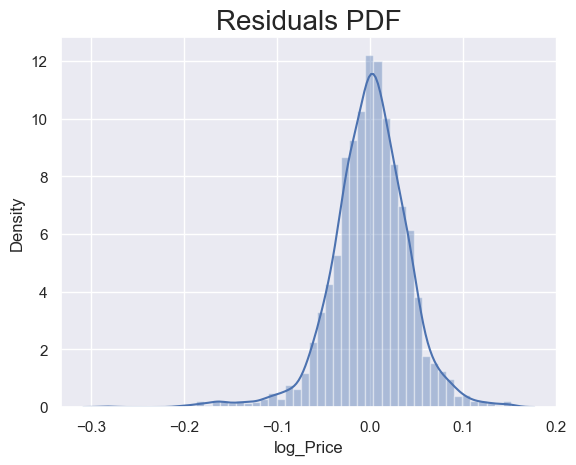

In [101]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=20 )

In [102]:
reg.score(x_train,y_train)

0.7843617679445598

In [103]:
reg.intercept_

2.2559181305891283

In [104]:
reg.coef_

array([-0.04468023,  0.02389888,  0.00281828,  0.00186726, -0.01637126,
       -0.02141012, -0.00835301, -0.0099009 , -0.01257968, -0.00880448,
       -0.0160327 , -0.01058087, -0.01570428, -0.008755  , -0.0030285 ,
       -0.01289439,  0.03318361])

In [105]:
reg_summary= pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['weighhts']=reg.coef_
reg_summary

,Features,weighhts
0,Mileage,-0.044680
1,EngineV,0.023899
2,Brand_BMW,0.002818
3,Brand_Mercedes-Benz,0.001867
4,Brand_Mitsubishi,-0.016371
5,Brand_Renault,-0.021410
6,Brand_Toyota,-0.008353
7,Brand_Volkswagen,-0.009901
8,Body_hatch,-0.012580
9,Body_other,-0.008804


In [108]:
y_hat_test=reg.predict(x_test)

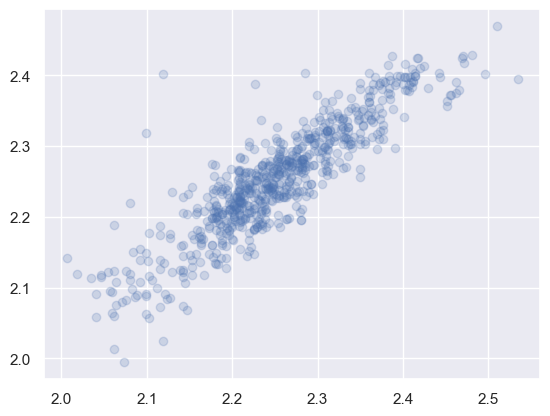

In [112]:
plt.scatter(y_test,y_hat_test, alpha=0.2)